### 参考[知乎专栏](https://zhuanlan.zhihu.com/p/42904109)

In [1]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 加载一张测试图片

(1, 224, 224, 3)

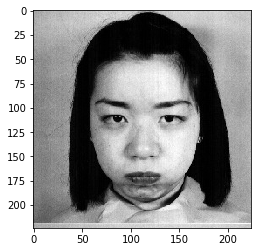

In [2]:
img_path = '../../jaffe/ANGRY/angry30.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

### 我们导入VGG模型，去掉FC层（就是把include_top设为FALSE），因为如果有FC层在的话，由于FC层神经元个数是固定的，所以网络的输入形状就有限制，就必须跟原来的网络的输入一模一样。但是卷积层不受输入形状的限制，因此我们只保留卷积层（和池化层）。

In [6]:
base_model = VGG16(weights='imagenet',include_top=False)
# 获取各层的输出：
layer_outputs = [layer.output for layer in base_model.layers[2:20]]
# 获取各层的名称：
layer_names = []
for layer in base_model.layers[2:20]:
    layer_names.append(layer.name)
print(layer_names)

['block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


In [7]:
# 组装模型：
model = Model(inputs=base_model.input, outputs=layer_outputs)
# 将前面的图片数据x，输入到model中，得到各层的激活值activations：
activations = model.predict(x)

### 将每一层激活得到的图片打印出来看看了。 我们将每一层所有filters对应的图片拼在一起显示，代码如下：

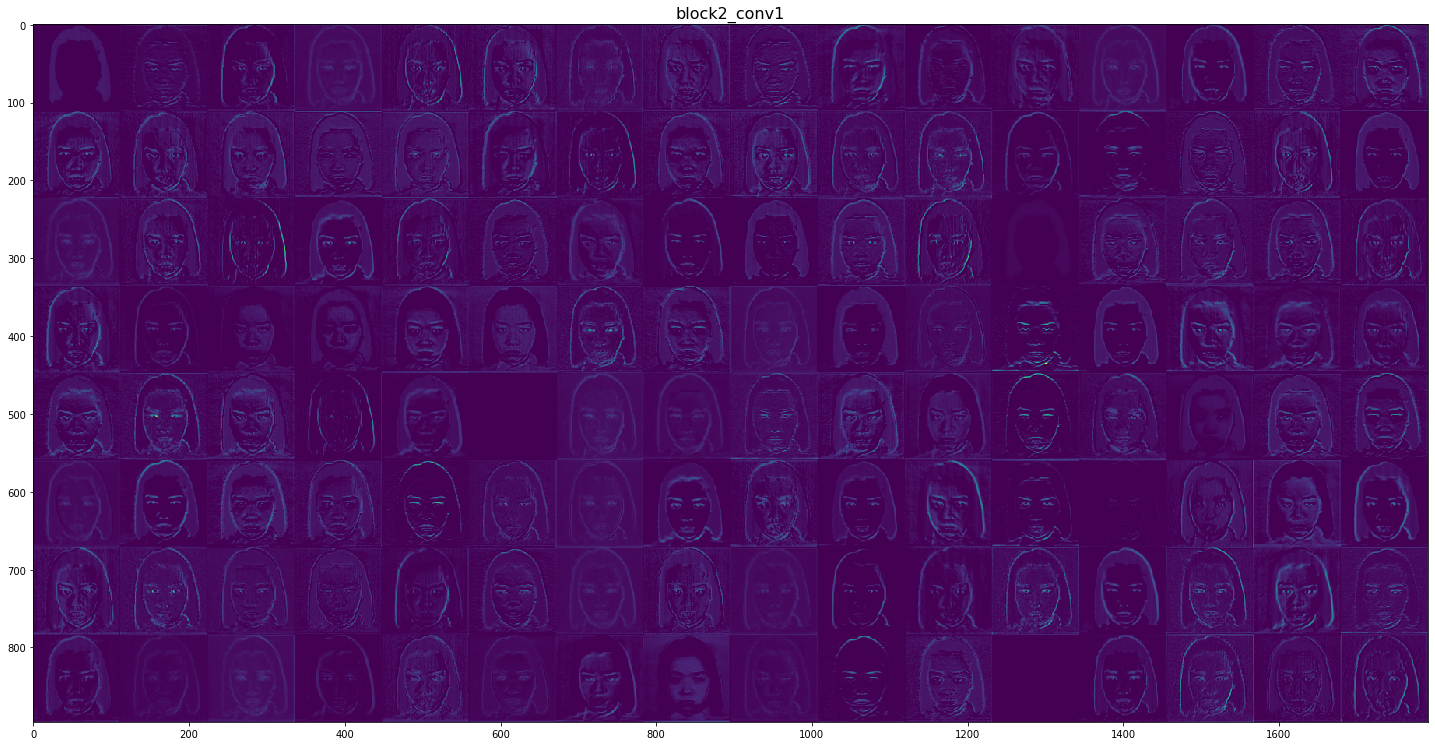

In [9]:
import math
for activation,layer_name in zip(activations[2:3],layer_names[2:3]):
    h = activation.shape[1]
    w = activation.shape[2]
    num_channels = activation.shape[3]
    cols = 16
    rows = math.ceil(num_channels/cols)
    img_grid = np.zeros((h*rows,w*cols))

    for c in range(num_channels):
        f_r = math.ceil((c+1)/cols)
        f_c = (c+1)if f_r==1 else (c+1-(f_r-1)*cols)
        img_grid[(f_r-1)*h:f_r*h,(f_c-1)*w:f_c*w ] = activation[0,:,:,c]


    plt.figure(figsize=(25,25))
    plt.imshow(img_grid, aspect='equal',cmap='viridis')
    plt.grid(False)
    plt.title(layer_name,fontsize=16)
plt.show()

In [13]:
cnn_featues=model.predict(x)
layer_features=cnn_featues[2][0]
mean_features=np.mean(layer_features,axis=2)
features=mean_features

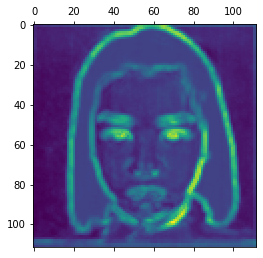

In [18]:
import matplotlib.pyplot as plt
plt.matshow(features, cmap='viridis')
plt.show()

In [19]:
activations[2].shape

(1, 112, 112, 128)